<a href="https://colab.research.google.com/github/jay-thakur/Fake_News_Classifier/blob/main/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset



In [1]:
cd '/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier/'

/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier


In [2]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn

# Load the dataset

In [3]:
true_dataset = pd.read_csv('data/True.csv') 
fake_dataset = pd.read_csv('data/Fake.csv') 

In [4]:
true_dataset.shape

(21417, 4)

In [5]:
true_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
true_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_dataset.shape

(23481, 4)

In [8]:
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true_dataset["label"] = np.ones(true_dataset.shape[0], dtype=int)
true_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
fake_dataset["label"] = np.zeros(fake_dataset.shape[0], dtype=int)
fake_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
dataset = pd.concat((true_dataset, fake_dataset), axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
dataset = dataset.sample(frac=1)
dataset.head()

,title,text,subject,date,label
6442,Mexico’s Former President UNLOADS On Trump Wi...,"Donald Trump has p*ssed off so many people, it...",News,"May 10, 2016",0
19087,BRITISH COLUMNIST KATIE HOPKINS Has BRUTAL Rea...,"Mack Beggs, the transgender wrestler from Eule...",left-news,"Feb 25, 2017",0
16150,China signals will again block Indian bid to b...,BEIJING (Reuters) - China on Monday signaled i...,worldnews,"October 30, 2017",1
16319,Hot air? U.S. gas exporters rush to sell LNG t...,BEIJING (Reuters) - U.S. gas exporters and tra...,worldnews,"October 27, 2017",1
10333,"Obama adds Saudi, Britain stops to Germany tri...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"March 16, 2016",1


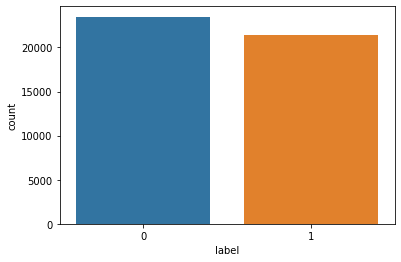

In [14]:
sns.countplot(dataset['label'])
plt.show()

In [15]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [16]:
df = pd.get_dummies(dataset, columns=["subject"])
df.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
6442,Mexico’s Former President UNLOADS On Trump Wi...,"Donald Trump has p*ssed off so many people, it...","May 10, 2016",0,0,0,1,0,0,0,0,0
19087,BRITISH COLUMNIST KATIE HOPKINS Has BRUTAL Rea...,"Mack Beggs, the transgender wrestler from Eule...","Feb 25, 2017",0,0,0,0,0,1,0,0,0
16150,China signals will again block Indian bid to b...,BEIJING (Reuters) - China on Monday signaled i...,"October 30, 2017",1,0,0,0,0,0,0,0,1
16319,Hot air? U.S. gas exporters rush to sell LNG t...,BEIJING (Reuters) - U.S. gas exporters and tra...,"October 27, 2017",1,0,0,0,0,0,0,0,1
10333,"Obama adds Saudi, Britain stops to Germany tri...",WASHINGTON (Reuters) - U.S. President Barack O...,"March 16, 2016",1,0,0,0,0,0,0,1,0


In [17]:
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 6442 to 13950
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 3.0+ MB


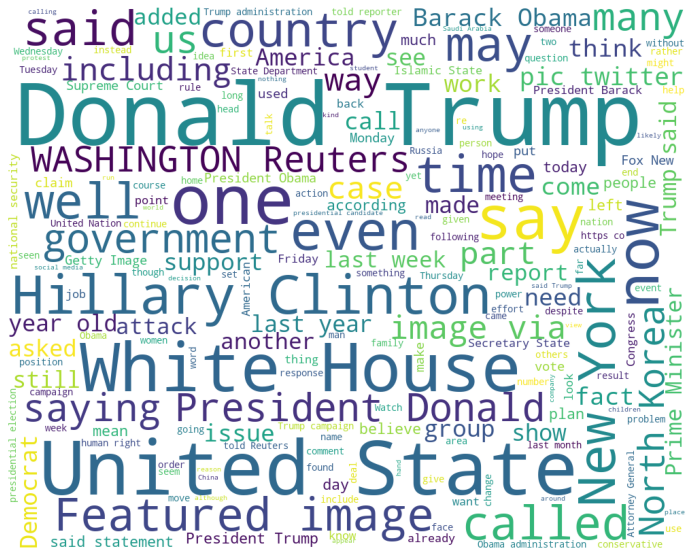

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess the data

In [20]:
def preprocess(data):
  pattern = "[^a-zA-Z]"
  lemmatizer = WordNetLemmatizer()
  new = []
  for txt in data:
    txt = txt.lower()
    txt = re.sub(pattern, " ", txt)
    txt = word_tokenize(txt)
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = " ".join(txt)
    new.append(txt)
  return new

In [21]:
text_new = preprocess(df.text)
text_new[0]

'donald trump ha p ssed off so many people it s really hard to keep track unless you re the donald himself in which case you ll never let it go one person he s irritated arguably more than others is mexico s former president vicente fox who ha being railing against trump since the very day the disgraced presumptive gop nominee made his horrifically offensive rapist and drug dealer comment about mexican immigrant fox reminded everyone that he still hate trump with a passion and ha even come up with some creative nickname for the business mogul in an interview on the kickass politics podcast fox told host ben mathis he is the ugly american he is the hated gringo because he s attacking all of u he s offending all of u fox also reaffirmed the fact that mexico would have nothing to do with trump s idiotic proposed border wall restating his opposition to trump s wall just a strongly a he did the first time fox said i m not going to pay for that f cking wall and please don t take out the f ck

In [22]:
title_new = preprocess(df.title)
title_new[0]

'mexico s former president unloads on trump with a brutal f ck you to the hated gringo image'

In [23]:
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)

title_vector = title_vectorizer.fit_transform(title_new).toarray() 
text_vector = text_vectorizer.fit_transform(text_new).toarray()

In [24]:
df.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
6442,Mexico’s Former President UNLOADS On Trump Wi...,"Donald Trump has p*ssed off so many people, it...",0,0,0,1,0,0,0,0,0
19087,BRITISH COLUMNIST KATIE HOPKINS Has BRUTAL Rea...,"Mack Beggs, the transgender wrestler from Eule...",0,0,0,0,0,1,0,0,0
16150,China signals will again block Indian bid to b...,BEIJING (Reuters) - China on Monday signaled i...,1,0,0,0,0,0,0,0,1
16319,Hot air? U.S. gas exporters rush to sell LNG t...,BEIJING (Reuters) - U.S. gas exporters and tra...,1,0,0,0,0,0,0,0,1
10333,"Obama adds Saudi, Britain stops to Germany tri...",WASHINGTON (Reuters) - U.S. President Barack O...,1,0,0,0,0,0,0,1,0


In [25]:
df.drop(["title","text"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 6442 to 13950
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.3 MB


In [26]:
print(df.shape)
print(title_vector.shape)
print(text_vector.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [27]:
X = np.concatenate((np.array(df.drop("label", axis=1)), title_vector, text_vector), axis=1)
y = df['label']

In [28]:
print(X.shape)
print(y.shape)

(44898, 5008)
(44898,)


# Divide the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31428, 5008)
(13470, 5008)
(31428,)
(13470,)


# Logistic Regression

It models the probabilities of classification problem with two possible outcomes. it value ranges from 0 to 1. The logistic function is defind as - 

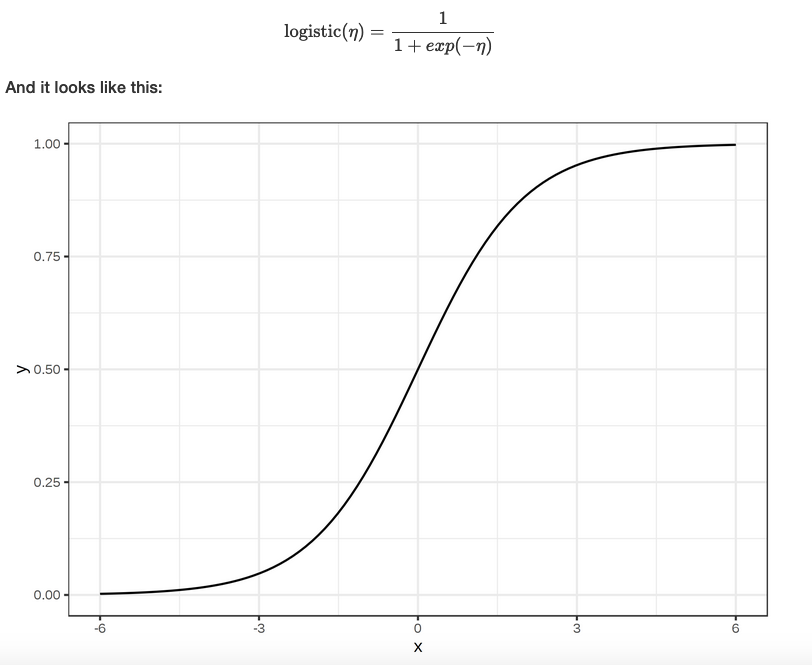

accuracy: 99.933


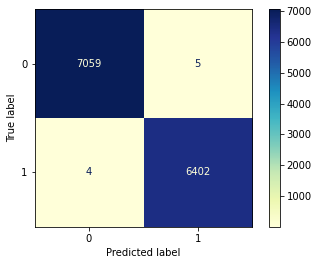

In [30]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy: %0.3f" %(lr_acc*100))

plot_confusion_matrix(lr_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

# cm = confusion_matrix(y_test, lr_pred)
# sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2%')
# plt.show()

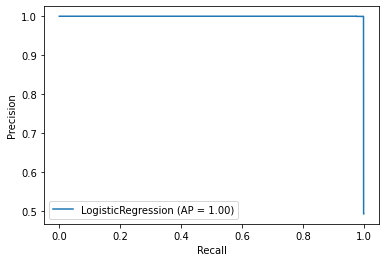

In [31]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.show()

# Decision Tree Classifier

it uses a tree like structure and their possible combinations to solve a particular problem.

A decision tree consists of a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

While implementing the Decision-Tree algorithm, We make following assumptions -

* At the beginning, the whole training set is considered as the root.
* Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

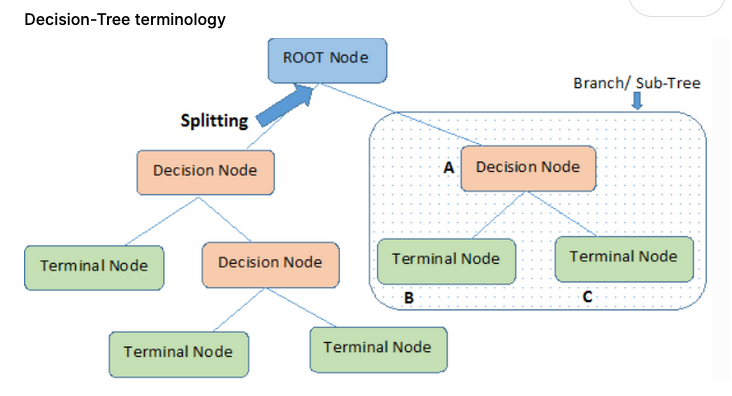


accuracy: 99.993


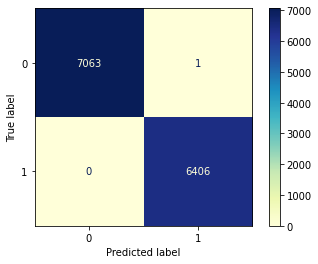

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy: %0.3f" %(dt_acc*100))

plot_confusion_matrix(dt_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

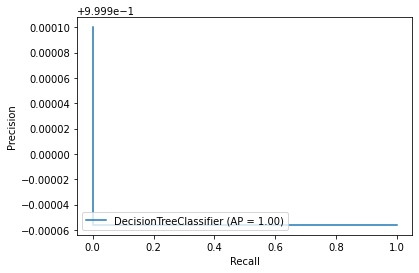

In [33]:
plot_precision_recall_curve(dt_model, X_test, y_test)
plt.show()

# Random Forest Classifier

Random forest is made up of several trees & select the best soluction democratically (by voting).

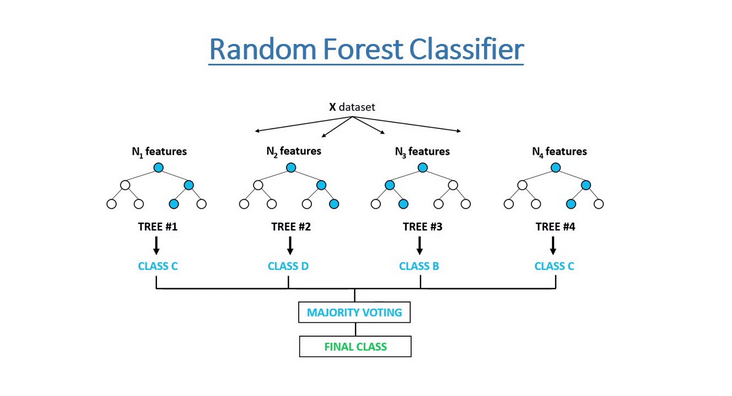

accuracy: 99.978


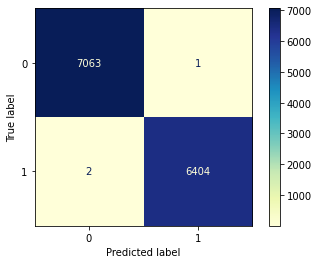

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(rf_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

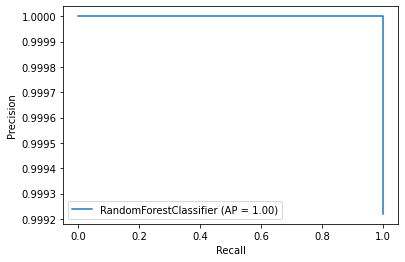

In [35]:
plot_precision_recall_curve(rf_model, X_test, y_test)
plt.show()

# Naive Bayes

Niave bayes assumes that all the features are independent. it uses the Baye's algorithm to predict probabilities of each class.

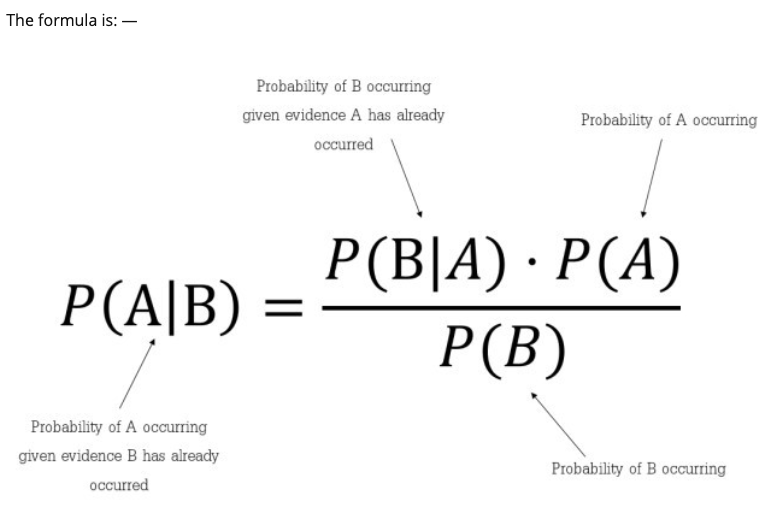

* Gaussian Naive Bayes
* Multinomial Naive Bayes

accuracy: 96.585


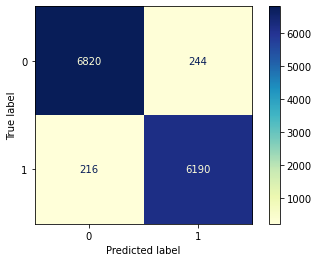

In [36]:
nbc_model = MultinomialNB()
nbc_model.fit(X_train, y_train)
nbc_pred = nbc_model.predict(X_test)

nbc_acc = accuracy_score(y_test, nbc_pred)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(nbc_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

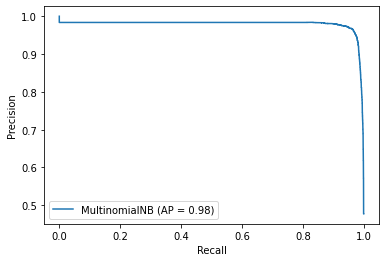

In [37]:
plot_precision_recall_curve(nbc_model, X_test, y_test)
plt.show()

alpha: 1e-06, accuracy : 98.0029695619896
alpha: 1e-05, accuracy : 97.86933927245731
alpha: 0.0001, accuracy : 97.65404602821084
alpha: 0.001, accuracy : 97.35708982925019
alpha: 0.01, accuracy : 97.1863400148478
alpha: 0.1, accuracy : 96.9116555308092
alpha: 1, accuracy : 96.58500371195248


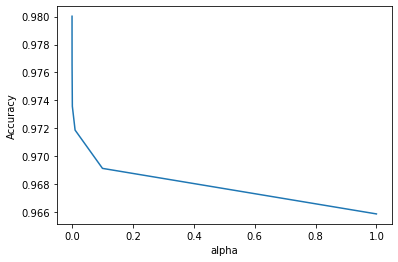

In [38]:
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mnb_acc = []
for alpha in alpha_values:
    nbc_model_a = MultinomialNB(alpha)
    nbc_model_a.fit(X_train, y_train)
    nbc_a_pred = nbc_model_a.predict(X_test)
    acc = accuracy_score(y_test, nbc_a_pred)
    mnb_acc.append(acc)
    print(f'alpha: {alpha}, accuracy : {acc*100}')

sns.lineplot(alpha_values, mnb_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

# ANN

Artificial Neural Network is a multi-layer fully connected neural network that consists of an input layer, multiple hidden layer, and an output layer. Every node in a layer is connected to every other node in the next layer.

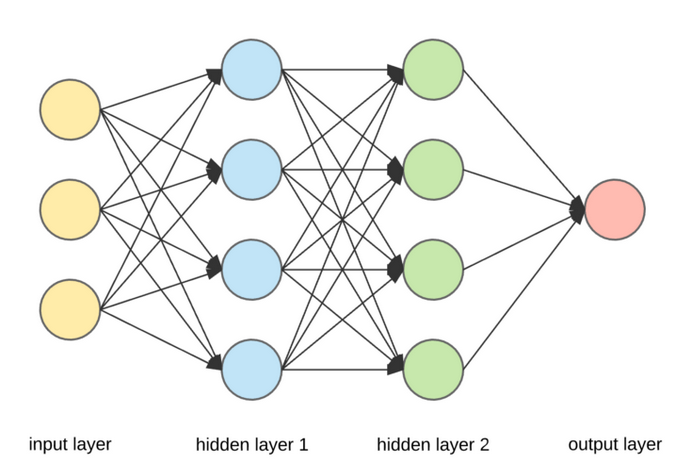


Each node works like this. 
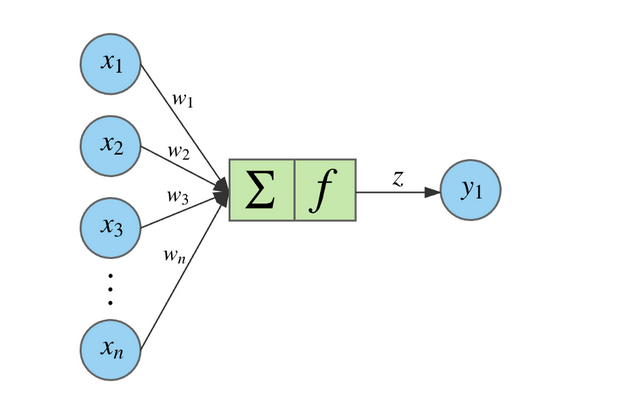

## Activation Layer
the activation function of a node defines the output of that node given an input or set of inputs. perform a transformation on the input received, in order to keep values within a manageable range.
### ReLu

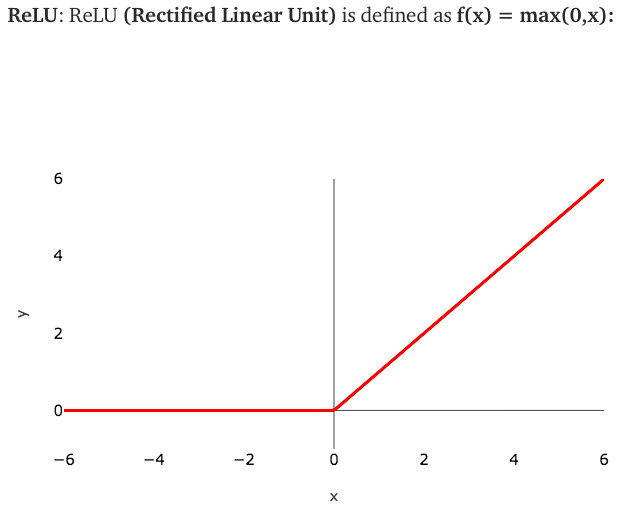

## Dropout Layer

Dropout layer is used to prevent overfitting. dropout means ingore these units. those units wont be considered for forward & backward pass.

In [39]:
class Simple_Net(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net,self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        
        return out
    

model = Simple_Net()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

Epoch : 0, Loss : 0.6921384930610657
Epoch : 1, Loss : 0.6654311418533325
Epoch : 2, Loss : 11.287829399108887
Epoch : 3, Loss : 0.7747352719306946
Epoch : 4, Loss : 0.5759187340736389
Epoch : 5, Loss : 0.6183255910873413
Epoch : 6, Loss : 0.4919961094856262
Epoch : 7, Loss : 0.47226467728614807
Epoch : 8, Loss : 0.3815551698207855
Epoch : 9, Loss : 0.30874019861221313
Epoch : 10, Loss : 0.22278565168380737
Epoch : 11, Loss : 0.1550116091966629
Epoch : 12, Loss : 0.10392197966575623
Epoch : 13, Loss : 0.07010768353939056
Epoch : 14, Loss : 0.06284479796886444
Epoch : 15, Loss : 0.04413989558815956
Epoch : 16, Loss : 0.034042395651340485
Epoch : 17, Loss : 0.025625864043831825
Epoch : 18, Loss : 0.016949363052845
Epoch : 19, Loss : 0.014603341929614544


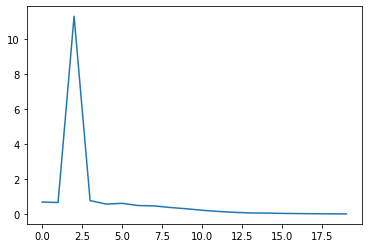

In [40]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 20

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch}, Loss : {loss}')

plt.plot(losses)

accuracy : 99.46547884187082%


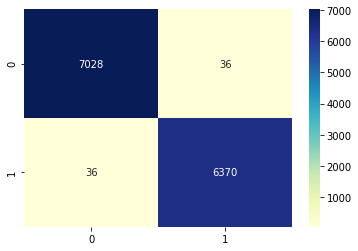

In [41]:
y_hat = model(X_test)
y_pred = torch.max(y_hat, 1)[1] # Convert pred into labels
nn_acc = accuracy_score(y_pred, y_test)
print(f'accuracy : {nn_acc*100}%')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

### Experiment

**HyperParameter Tuning** - is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. for example learning rate, batch size

**Overfitting** - When out model performs poor on unseen data, means gives high accuracy on train data but less accuracy on test data, that is called as overfitting.

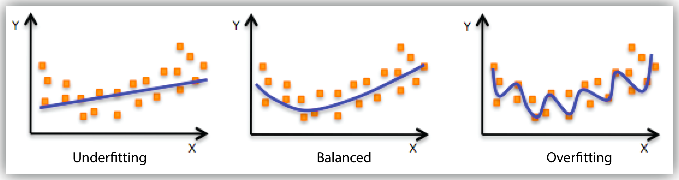


Epoch : 1, Loss : 0.6924171447753906
Epoch : 2, Loss : 0.6246550679206848
Epoch : 3, Loss : 0.3464958667755127
Epoch : 4, Loss : 1.0334737300872803
Epoch : 5, Loss : 0.9633155465126038
Epoch : 6, Loss : 0.18268321454524994
Epoch : 7, Loss : 0.21038247644901276
Epoch : 8, Loss : 0.242714062333107
Epoch : 9, Loss : 0.24903705716133118
Epoch : 10, Loss : 0.21740831434726715
Epoch : 11, Loss : 0.15752629935741425
Epoch : 12, Loss : 0.10221720486879349
Epoch : 13, Loss : 0.07748078554868698
Epoch : 14, Loss : 0.09306847304105759
Epoch : 15, Loss : 0.07752121239900589
Epoch : 16, Loss : 0.048230018466711044
Epoch : 17, Loss : 0.039647266268730164
Epoch : 18, Loss : 0.03914692625403404
Epoch : 19, Loss : 0.03278325870633125
Epoch : 20, Loss : 0.023497603833675385
Epoch : 21, Loss : 0.017784200608730316
Epoch : 22, Loss : 0.01567603088915348
Epoch : 23, Loss : 0.015839627012610435
Epoch : 24, Loss : 0.014861328527331352
Epoch : 25, Loss : 0.011986298486590385
Epoch : 26, Loss : 0.0087419366464

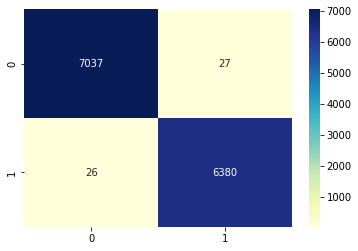

In [44]:
class Simple_Net1(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net1, self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 50)
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(50, 10)
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(10, 2)

        self.dropout = nn.Dropout(0.1)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        # out = self.dropout(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        out = self.relu5(out)

        out = self.linear6(out)
        
        return out
    

model_1 = Simple_Net1()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)
# y_train = torch.Tensor(y_train.type(torch.FloatTensor))

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 50

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model_1(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch+1}, Loss : {loss}')

y_hat = model_1(X_test)
y_pred = torch.max(y_hat,1)[1] # Convert pred into labels

nn_acc_4_hl = accuracy_score(y_pred, y_test)
print(f'accuracy on 4 hidden layer : {nn_acc_4_hl}')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

Experimented with many hidden layers & changing hyperparameters like learning rate, batchsize. also tried adding dropout layer. But the current network architecure gives best accuracy.

# Model Accuracies

In [45]:
models_accuracies = pd.DataFrame([["Logistic Regression", lr_acc], ["Naive Bayes", nbc_acc], ["Decision Tree", dt_acc],
                       ["Random Forest", rf_acc], ["Simple ANN", nn_acc], ["Modified ANN", nn_acc_4_hl]], columns=["Model", "Accuracy"])
models_accuracies

,Model,Accuracy
0,Logistic Regression,0.999332
1,Naive Bayes,0.965850
2,Decision Tree,0.999926
3,Random Forest,0.999777
4,Simple ANN,0.994655
5,Modified ANN,0.996065


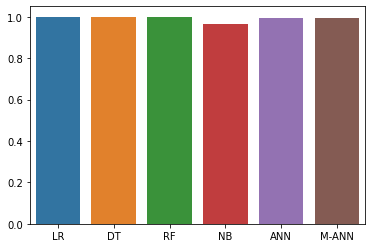

In [46]:
x = ['LR', 'DT', 'RF', 'NB', 'ANN', 'M-ANN']
y = [lr_acc, dt_acc, rf_acc, nbc_acc, nn_acc, nn_acc_4_hl]
sns.barplot(x, y)
plt.show()

## My Contribution

I have followed [this](https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98) to understand but visualised & implemented on my own. I also trined & checked accuracy on Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes (Multinomial NB) models.

## Challanges & solutions

Text preprocessing was a major challange. then implementing & finding good accurcy on different models was a challange too. 

Went through many articles to understand text preprocessing & for finding good accuracy.



## References

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98

http://datamine.unc.edu/jupyter/notebooks/Text%20Mining%20Modules/(1)%20Text%20Preprocessing.ipynb

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

https://christophm.github.io/interpretable-ml-book/logistic.html

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://en.wikipedia.org/wiki/Activation_function

https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

https://www.kaggle.com/akarsh1/fakenews-classification-using-ml-and-deep-learning

https://www.kaggle.com/sukanyabag/fake-news-classifiernlp

https://www.kaggle.com/pinkychauhan/fakenewsclassifierusingnltk-sklearn

https://www.kaggle.com/gokulzuzumaki/nlp-for-beginners-vectorizers-and-classifiers